## Numpy 数値計算用ライブラリ

In [1]:
import numpy as np

In [2]:
##  ベクトルの定義
x = np.array([1,2,3])

In [3]:
x

array([1, 2, 3])

In [4]:
y = np.array([2,3.9,6.1])

In [5]:
y

array([2. , 3.9, 6.1])

## データの中心化

In [6]:
## 平均の算出
x.mean()

2.0

In [7]:
y.mean()

4.0

In [8]:
## 中心化
xc = x - x.mean()

In [9]:
xc

array([-1.,  0.,  1.])

In [10]:
yc = y - y.mean()

In [11]:
yc

array([-2. , -0.1,  2.1])

## パラメータaの計算

In [14]:
## 要素毎の掛け算（要素積）
xx = xc * xc

In [15]:
xx

array([1., 0., 1.])

In [19]:
xy = xc * yc

In [21]:
xy

array([ 2. , -0. ,  2.1])

In [22]:
xx.sum()

2.0

In [23]:
xy.sum()

4.1

In [24]:
a = xy.sum() / xx.sum()

In [25]:
a

2.05

## Pandas データベースの操作

In [26]:
import pandas as pd

In [30]:
## CSVファイルの読みこみ
## df データフレーム dataframeの略
df = pd.read_csv('sample.csv')

In [31]:
df

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
...,...,...
95,47.250,250000.0
96,43.722,166500.0
97,42.642,151500.0
98,43.644,173000.0


In [33]:
## 先頭の3つだけ表示
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [35]:
## dfのxだけを抽出
x = df['x']
## 同様にyも抽出
y = df['y']

## データをグラフで見たい：Matplotlibを使用

In [36]:
## これで覚える！！
import matplotlib.pyplot as plt

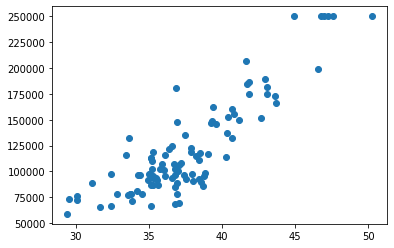

In [38]:
## 散布図(scatter)でプロット　横軸x 縦軸y
plt.scatter(x,y)
plt.show()

## 単回帰分析の実装

## ①データの中心化

In [39]:
## データの概要を表示 メッチャ便利
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [41]:
## データフレームごと平均をとる事が出来る
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [43]:
## 中心化したデータ
df_c = df - df.mean()

In [44]:
df_c

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0
3,-0.80022,-24565.0
4,-0.62022,-20565.0
...,...,...
95,9.62778,128935.0
96,6.09978,45435.0
97,5.01978,30435.0
98,6.02178,51935.0


In [45]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.918465e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


## ②データの抽出

In [47]:
## 中心化したので、データを抽出する
x = df_c['x']
y = df_c['y']

In [48]:
x

0     2.73978
1     3.06378
2     0.80778
3    -0.80022
4    -0.62022
       ...   
95    9.62778
96    6.09978
97    5.01978
98    6.02178
99    4.22778
Name: x, Length: 100, dtype: float64

In [49]:
y

0      16435.0
1      11435.0
2     -28065.0
3     -24565.0
4     -20565.0
        ...   
95    128935.0
96     45435.0
97     30435.0
98     51935.0
99     53435.0
Name: y, Length: 100, dtype: float64

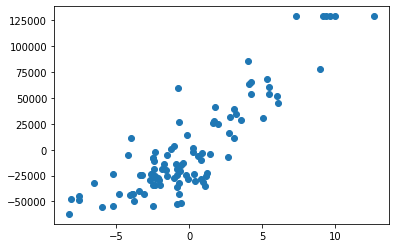

In [50]:
## 散布図表示
plt.scatter(x,y)
plt.show()

## ③パラメータaの計算

In [51]:
xx = x * x ##要素積
xy = x * y

In [52]:
a = xy.sum() / xx.sum()

In [53]:
a

10069.022519284063

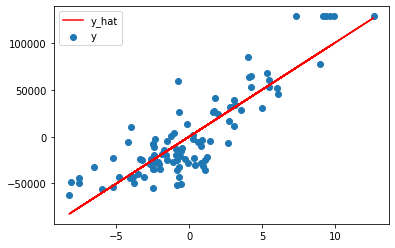

In [61]:
## aをプロットして確認　予測値はy^ = ax
plt.scatter(x,y,label='y') ## 実測値
plt.plot(x,a*x,label='y_hat',color='red')## 予測値
plt.legend()
plt.show()

## ④予測値の計算

In [62]:
## Ex. 40平米の部屋を予測したい
x_new = 40
mean = df.mean()

In [63]:
mean

x        37.62222
y    121065.00000
dtype: float64

In [64]:
mean['x']

37.62222

In [65]:
xc = x_new - mean['x']

In [66]:
xc

2.3777800000000013

In [68]:
## 単回帰分析による予測値の計算（中心化）
yc = a * xc

In [69]:
yc

23941.920365903272

In [70]:
## 元のスケールの予測値
y_hat = yc + mean['y']

In [71]:
y_hat

145006.92036590326

In [74]:
mean['y']

121065.0

## ⑤予測値を計算する関数を作る

In [75]:
## predictは予測という意味
def predict(x):
    a = 10069.022519284063
    xm = 37.62222 ## xの平均
    ym = 121065.0 ## yの平均
    
    ## 中心化
    xc = x - xm
    
    ## 予測値
    y_hat = a * xc + ym
    
    ## 出力する
    return y_hat

In [81]:
## 実際に計算してみる 内挿の範囲で予想できる。

predict(30)

44316.695173062646